In [3]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [4]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [5]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

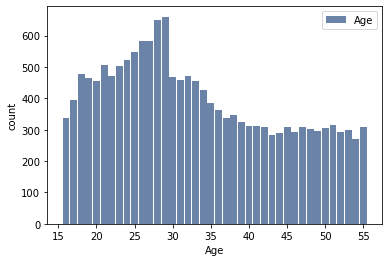

In [6]:
#histogram for Age
hist = thinkstats2.Hist(round(df["Age"],2),label = 'Age')
hist
thinkplot.Hist(hist)
thinkplot.config(xlabel ='Age',ylabel= 'count')


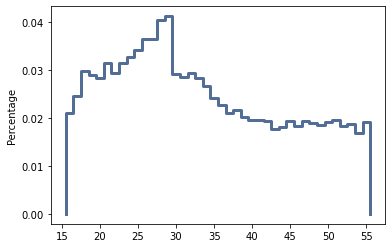

In [7]:
#Pmf for Age
age = df["Age"]
agepmf = thinkstats2.Pmf(age)
thinkplot.Pmf(agepmf)
thinkplot.config(Xlabel = "Age",ylabel = "Percentage")


#### What fraction of the people in the data are 51? What fraction are older than 51?

In [8]:
#people aged 51
age51 = (df["Age"] == 51).sum()
#total no.of people in dataset
total = df["Age"].shape[0]
print("Fraction of people in data aged 51 are",round(age51 / total,3),".")
#people aged greater than 51
agemore51 = df[df.Age > 51].shape[0]
print("Fraction of people older than 51 years are",round(agemore51 / total,3),".")



Fraction of people in data aged 51 are 0.02 .
Fraction of people older than 51 years are 0.073 .


##### What is the median age?

In [9]:
age = df["Age"]
print("Median age for data is",age.median())

Median age for data is 31.0


##### Does the distribution of the sample data seem to mirror the working age population?

Working age population is from 15 -65 years.
As seen from Statistics Canada data,As on right side after 30, age group is increasing,people count are decreasing.
Similar trend is observed from histogram plotted above for age group.
So, distribution of sample data is mirroring working age population.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [10]:
#black people
black = df["Race"].value_counts("black")
#hispanic people
Hispanic = df["Hisp"].value_counts("hispanic")
print(black)
print(Hispanic)
# a is variable for people who are black,age 25 0r more and are graduate
a = (df.loc[(df["Age"]>= 25) & (df["Race"]=="black") & (df["Eduacation"]=="graduate")])
print("Fraction of black people aged 25 or more having graduate degree is", len(a)/df.shape[0],".")
# b is variable for people who are hispanic,age 25 or more and have a graduate degree
b =  (df.loc[(df["Age"]>= 25) & (df["Hisp"]=="hispanic") & (df["Eduacation"]=="graduate")])
print("Fraction of hispanic people aged 25 or more having graduate degree is", len(b)/df.shape[0],".")


NotBlack    0.926463
black       0.073537
Name: Race, dtype: float64
NotHispanic    0.927964
hispanic       0.072036
Name: Hisp, dtype: float64
Fraction of black people aged 25 or more having graduate degree is 0.002751375687843922 .
Fraction of hispanic people aged 25 or more having graduate degree is 0.002876438219109555 .


1)As of 2019, distribution of U.S.population is 
white - 60.1%(Non-Hispanic), Hispanic - 18.5%, Black- 12.2%,  Rest- Multiple Races,Asians and others.
Our data shows black people as 7.35% and Hispanic as 7.2%.
2)In 2019, 18.8% of Hispanic age 25 and older had bachelors degree & our data shows 0.28% hispanic people of that agegroup has graduate degree.
3)26.1% of Black people have bachelors degree during same period & our data shows 0.27% black people of that agegroup has graduate degree.
So,this dataset cannot be considered as representative sample of U.S. population.


##### Demographic Conclusion


### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

Text(0.5, 1.0, '78')

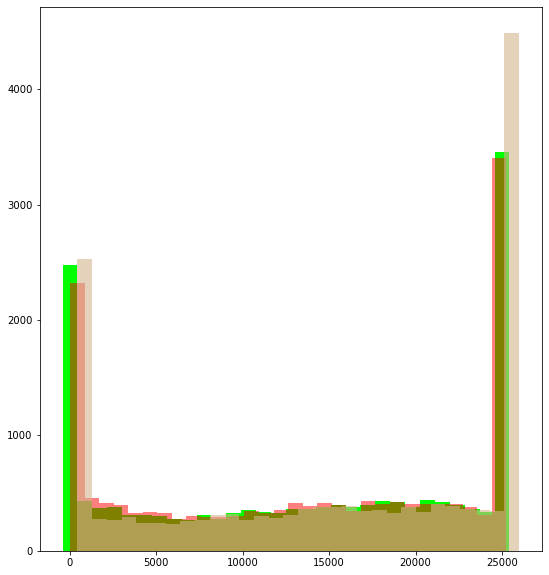

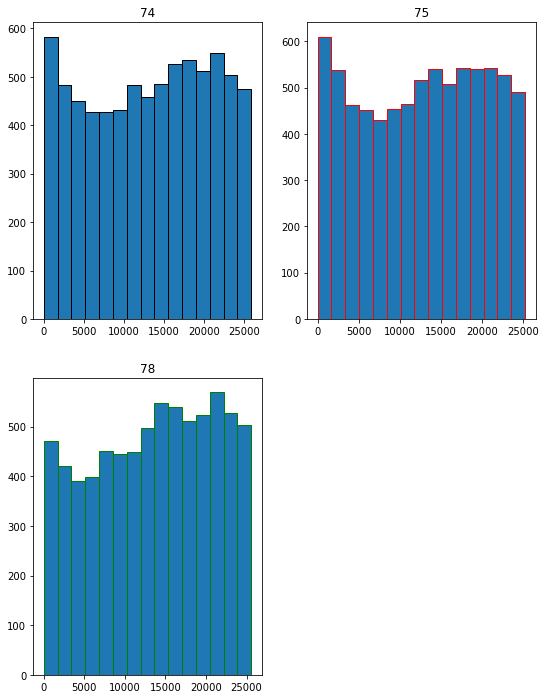

In [12]:
from turtle import color


earning74 = df["Earnings_1974"]
earning75 = df["Earnings_1975"]
earning78 = df["Earnings_1978"]
earning74Hist = thinkstats2.Hist(round(earning74),3)
earning75Hist = thinkstats2.Hist(round(earning75),3)
earning78Hist = thinkstats2.Hist(round(earning78),3)
plt.figure(figsize= (9,10))
plt.hist(earning74, bins= 30, label="74", alpha=1, align="left", color="lime")
plt.hist(earning75, bins=30, label= "75", alpha=0.5, align="mid", color="red")
plt.hist(earning78, bins=30, label="78",alpha=0.6, align="right", color="tan")

fig = plt.figure(figsize=(9,12))

ax1= fig.add_subplot(2, 2, 1)
ax2= fig.add_subplot(2, 2, 2)
ax3= fig.add_subplot(2, 2, 3)
n, bins, patches = ax1.hist(earning74Hist, bins=15, edgecolor='black')
ax1.set_title('74')
n, bins, patches = ax2.hist(earning75Hist, bins=15, edgecolor='red')
ax2.set_title('75')
n, bins, patches = ax3.hist(earning78Hist, bins=15, edgecolor='green')
ax3.set_title('78')



 As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 
In 1974 and 75, there were slightly more no.of people earning upto $2500 than same in 78.But in 78,as seen from overlapping histograms there were large no of people earning more than 25,000.for middle income range around 2500 to approximately around 25,000 there were almost equal no .of people in between 1974-1978.

In [13]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [14]:
#effect size for Race
black= df[df["Race"] == "black"]
notblack = df[df["Race"] == "NotBlack"]
Coheneffectsizerace = CohenEffectSize(notblack["Earnings_1978"], black["Earnings_1978"])
print("Cohen Effect size for race on 78 earnings is", Coheneffectsizerace,".")
#effect size for Hispanic
hispanic = df[df["Hisp"] == "hispanic"]
nothispanic = df[df["Hisp"] == "NotHispanic"]
coheneffecthisp = CohenEffectSize(nothispanic["Earnings_1978"],hispanic["Earnings_1978"])
print("Cohen effect size for hispanic on 78 earnings is",coheneffecthisp,".")
#effect size for Marital Status
married = df[df["MaritalStatus"] == "Married"]
notmarried = df[df["MaritalStatus"] == "NotMarried"]
coheneffectmarital = CohenEffectSize(married["Earnings_1978"],notmarried["Earnings_1978"])
print("cohen effect for marital status is",coheneffectmarital,".")
#effect size for Nodeg
nodegtrue = df[df["Nodeg"] == 1]
nodegfalse = df[df["Nodeg"] == 0]
coheneffectnodeg = CohenEffectSize(nodegfalse["Earnings_1978"],nodegtrue["Earnings_1978"])
print("cohen effect for nodeg is",coheneffectnodeg,".")
Maximum = max(Coheneffectsizerace,coheneffecthisp,coheneffectmarital,coheneffectnodeg)
print("Marital Status has greatest Effect size on 78 earnings.")

Cohen Effect size for race on 78 earnings is 0.31883255859070525 .
Cohen effect size for hispanic on 78 earnings is 0.16210284395555566 .
cohen effect for marital status is 0.5737396692403472 .
cohen effect for nodeg is 0.3367928897615812 .
Marital Status has greatest Effect size on 78 earnings.


<AxesSubplot:ylabel='Count'>

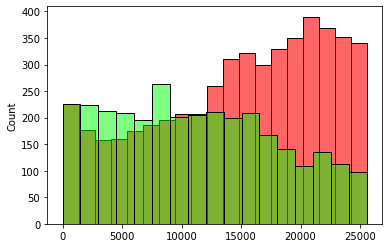

In [15]:
from cProfile import label


married = df[df["MaritalStatus"] == "Married"]
notmarried = df[df["MaritalStatus"] == "NotMarried"]
marriedhist = thinkstats2.Hist(np.floor(married["Earnings_1978"]))
notmarriedhist = thinkstats2.Hist(np.floor(notmarried["Earnings_1978"]))
sns.histplot(marriedhist, color='red',alpha=0.6, label='married')
sns.histplot(notmarriedhist, color='lime', alpha=0.5, label='notmarried')

We can see that for income range around $12,000, there is no difference betwern two groups.
from 2000-10,000 income,Notmarried people are slightly high in count than other group.
But above this range,there are high no.of married people earning between approximately 12,000 to $26,000.
Unmarried people count decreases in this range of earnings.

##### What to Investigate Further


##### Histogram and PMF

In [16]:
print("Basic Stats for earnings 78 is", df["Earnings_1978"].describe())


Basic Stats for earnings 78 is count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64


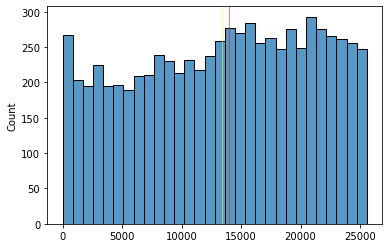

In [17]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 
hist = thinkstats2.Hist(df["Earnings_1978"],label = 'earnings78')
hist
sns.histplot(hist, bins=30)
thinkplot.axvline(np.mean(hist), color="yellow")
thinkplot.axvline(np.median(hist), color="red")


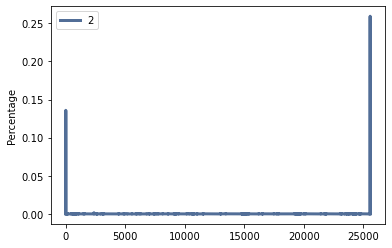

In [18]:
from thinkplot import Pmf
#Pmf for earning78
earning78 = df["Earnings_1978"]
earning78pmf = thinkstats2.Pmf(round(earning78),2)
thinkplot.Pmf(earning78pmf)
thinkplot.config(Xlabel = "earnings78",ylabel = "Percentage")


##### Differences in Median Income, and Theory on Why


##### Outliers

c:\Users\navne\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


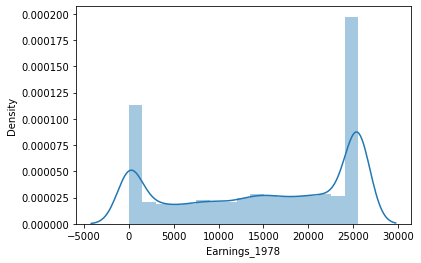

In [19]:
sns.distplot(df["Earnings_1978"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"})
plt.show()

As we can see from graph, there is peak around 26k ,which is outlier.

##### Outlier Conclusions


In [20]:
#Outlier conclusion
df["Earnings_1978"].describe()

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64

There is huge difference between mean and max value which also suggests presence of extreme value.
these outliers can change value of mean and standard deviation.
